# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Regression Model Evaluation

In [29]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)
data['PRICE'] = data['MEDV']

In [30]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV', 'PRICE'],
      dtype='object')

In [38]:
X = data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
y = data[['PRICE']]

## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, f1_score, recall_score, confusion_matrix

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=.2)

In [40]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404, 1), (102, 1))

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [41]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()


In [42]:
lm.fit(X_train, y_train)

LinearRegression()

In [43]:
y_predict_train = lm.predict(X_train)
y_predict_test = lm.predict(X_test)

## 3. Calculate and print R-squared for both the training and the testing set.

In [45]:
r2_score_train = r2_score(y_train, y_predict_train)
r2_score_test = r2_score(y_test, y_predict_test)

print(f'R-squared training: {r2_score_train}')
print(f'R-squared testing: {r2_score_test}')

R-squared training: 0.7508856358979673
R-squared testing: 0.6687594935356317


## 4. Calculate and print mean squared error for both the training and the testing set.

In [50]:
rmse_train = mean_squared_error(y_train, y_predict_train, squared=False)
rmse_test = mean_squared_error(y_test, y_predict_test, squared=False)

print(f"Mean squared error training: {rmse_train}")
print(f"Mean squared error testing: {rmse_test}")

Mean squared error training: 4.6520331848801675
Mean squared error testing: 4.928602182665339


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [49]:
mae_train = mean_absolute_error(y_train, y_predict_train)
mae_test = mean_absolute_error(y_test, y_predict_test)

print(f"Mean absolute error training: {mae_train}")
print(f"Mean absolute error testing: {mae_test}")

Mean absolute error training: 3.3147716267832252
Mean absolute error testing: 3.1890919658878416


## Classification Model Evaluation

In [51]:
from sklearn.datasets import load_iris

data = load_iris()

X_c = pd.DataFrame(data["data"], columns=data["feature_names"])
y_c = pd.DataFrame(data["target"], columns=["class"])


In [53]:
X_c.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [71]:
y_c.head()

,class
0,0
1,0
2,0
3,0
4,0


## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X_c,y_c, test_size=.2)

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [88]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression()

In [89]:
logr.fit(X_train, y_train)

LogisticRegression()

In [90]:
y_predict_train = logr.predict(X_train)
y_predict_test = logr.predict(X_test)

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [91]:
acc_train = accuracy_score(y_train, y_predict_train)
acc_test = accuracy_score(y_test, y_predict_test)

print(f"accuracy score training: {acc_train}")
print(f"accuracy score testing: {acc_test}")

accuracy score training: 0.9833333333333333
accuracy score testing: 0.9333333333333333


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [92]:
bal_acc_train = balanced_accuracy_score(y_train, y_predict_train)
bal_acc_test = balanced_accuracy_score(y_test, y_predict_test)

print(f"Balanced accuracy score training: {bal_acc_train}")
print(f"Balanced accuracy score testing: {bal_acc_test}")

Balanced accuracy score training: 0.9841269841269842
Balanced accuracy score testing: 0.9107142857142857


## 10. Calculate and print the precision score for both the training and the testing set.

In [93]:
prec_train = precision_score(y_train, y_predict_train, average='macro')
prec_test = precision_score(y_test, y_predict_test, average='macro')

print(f"Precision score training: {prec_train}")
print(f"Precision score testing: {prec_test}")

Precision score training: 0.9851851851851853
Precision score testing: 0.9107142857142857


## 11. Calculate and print the recall score for both the training and the testing set.

In [94]:
rec_train = recall_score(y_train, y_predict_train, average='macro')
rec_test = recall_score(y_test, y_predict_test, average='macro')

print(f"Recall score training: {rec_train}")
print(f"Recall score testing: {rec_test}")

Recall score training: 0.9841269841269842
Recall score testing: 0.9107142857142857


## 12. Calculate and print the F1 score for both the training and the testing set.

In [95]:
f1_train = f1_score(y_train, y_predict_train, average='macro')
f1_test = f1_score(y_test, y_predict_test, average='macro')

print(f"F1 score training: {f1_train}")
print(f"F1 score testing: {f1_test}")

F1 score training: 0.9842941611234295
F1 score testing: 0.9107142857142857


## 13. Generate confusion matrices for both the training and the testing set.

In [96]:
cm_train = confusion_matrix(y_train, y_predict_train)
cm_test = confusion_matrix(y_test, y_predict_test)

In [97]:
cm_train

array([[35,  0,  0],
       [ 0, 40,  2],
       [ 0,  0, 43]], dtype=int64)

In [98]:
cm_test

array([[15,  0,  0],
       [ 0,  7,  1],
       [ 0,  1,  6]], dtype=int64)

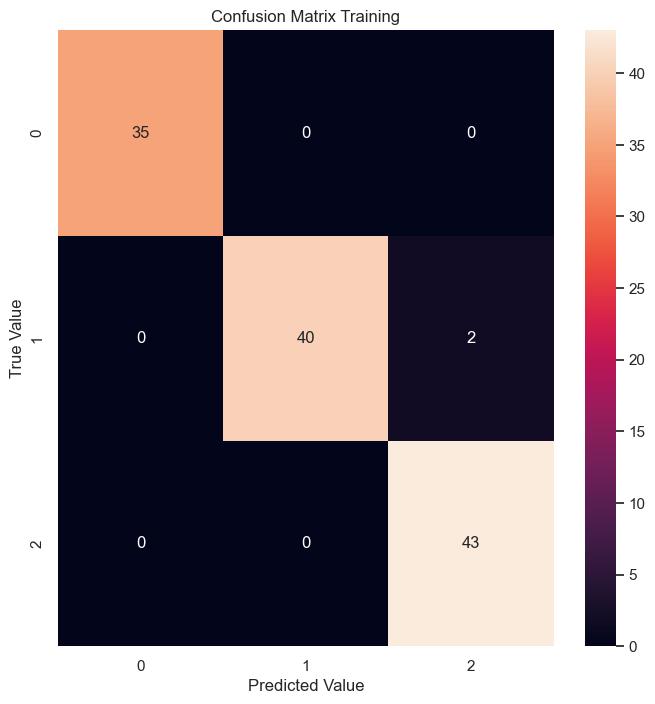

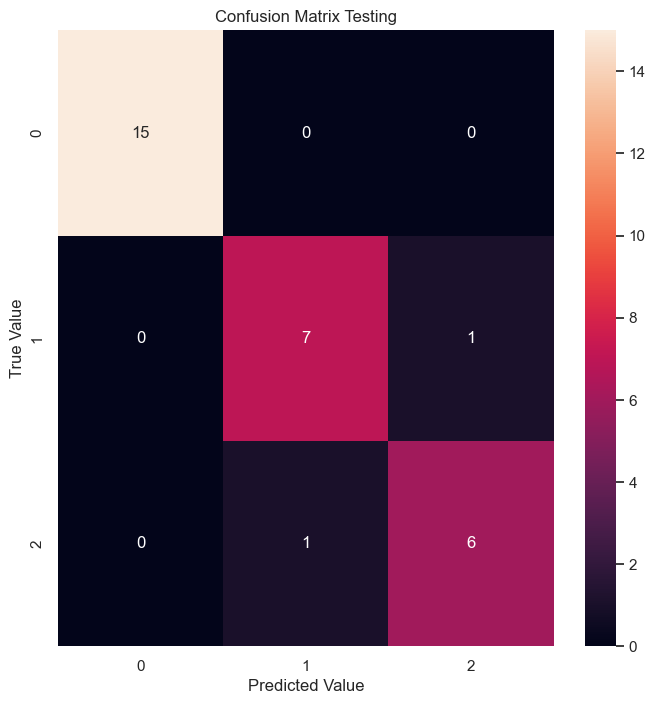

In [103]:
sns.heatmap(cm_train, annot=True)
sns.set(rc={'figure.figsize':(8,8)})
plt.title('Confusion Matrix Training')
plt.ylabel('True Value')
plt.xlabel('Predicted Value')
plt.show();
        
sns.heatmap(cm_test, annot=True)
sns.set(rc={'figure.figsize':(8,8)})
plt.title('Confusion Matrix Testing')
plt.ylabel('True Value')
plt.xlabel('Predicted Value')
plt.show();

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.